# Pattern Recognition HW2

# RBF Networks

In [1]:
import random
import time
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from rbf_network import RBFN
from dataset import MGDDataset

In [2]:
time.time()
RANDOM_SEED = 777

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

Path("./rbf_network").mkdir(parents=True, exist_ok=True)

## Dataset

In [4]:
dataset = MGDDataset.generate_entire_dataset(cls1_dataset_n=1000, cls2_dataset_n=1000, is_shuffle=True)
dataset.convert_label_zero_to_neg()

In [5]:
train_test_dataset_dict = dataset.train_test_split(test_ratio=0.25)
train_dataset = train_test_dataset_dict["train_dataset"]
val_dataset = train_test_dataset_dict["val_dataset"]

print(f"Size of train dataset : {len(train_dataset)}, Size of val dataset : {len(val_dataset)}")

Size of train dataset : 1500, Size of val dataset : 500


## Train & Validation

In [6]:
clf = RBFN(hidden_shape=75, sigma=1.0)

In [7]:
clf.fit(X=train_dataset.X, Y=train_dataset.y)

In [9]:
pred_list = clf.predict(X=val_dataset.X)

In [10]:
transformed_pred_list = [1 if pred >= 0 else -1 for pred in pred_list]

metrics_dict = classification_report(
    y_true=val_dataset.y,
    y_pred=transformed_pred_list,
    target_names=["class_1", "class_2"],
    output_dict=True
)
print(classification_report(
    y_true=val_dataset.y,
    y_pred=transformed_pred_list,
    target_names=["class_1", "class_2"],
    output_dict=False
))

              precision    recall  f1-score   support

     class_1       0.96      0.97      0.97       246
     class_2       0.97      0.96      0.97       254

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [11]:
clf_result_dict = dict(
    classifier=clf,
    pred_list=pred_list
)

## Plotting

In [12]:
def plot_decision_boundary(clf, dataset, ax):
    min_f1, max_f1 = np.min(dataset.X[:, 0]), np.max(dataset.X[:, 0])
    min_f2, max_f2 = np.min(dataset.X[:, 1]), np.max(dataset.X[:, 1])

    f1_space = np.linspace(min_f1, max_f1, 100)
    f2_space = np.linspace(min_f2, max_f2, 100)

    f1f1, f2f2 = np.meshgrid(f1_space, f2_space)

    feature_space = np.vstack([f1f1.ravel(), f2f2.ravel()]).T
    prob_feature_space = clf.predict(feature_space).reshape(f1f1.shape)

    ax.contour(f1f1, f2f2, prob_feature_space * 2, colors='k', levels=1, alpha=0.5, linestypes=['--','-','--'])
    ax.pcolormesh(f1f1, f2f2, - prob_feature_space * 2, cmap=plt.cm.RdBu)


In [13]:
def plot(clf_result_dict, entire_dataset, val_dataset, is_saved=True):
    clf = clf_result_dict["classifier"]
    pred_y_list = clf_result_dict["pred_list"]
    val_dataset.filter_by_pred(pred_y_list=pred_y_list, cls=0)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

    ax[0].scatter(entire_dataset.filter_by_class(cls=-1).T[0], entire_dataset.filter_by_class(cls=-1).T[1], label="Class 1")
    ax[0].scatter(entire_dataset.filter_by_class(cls=1).T[0], entire_dataset.filter_by_class(cls=1).T[1], label="Class 2")
    ax[0].set_title("Entire Dataset")
    ax[0].legend()

    plot_decision_boundary(clf=clf, dataset=val_dataset, ax=ax[1])
    ax[1].scatter(val_dataset.filter_by_class(cls=-1).T[0], val_dataset.filter_by_class(cls=-1).T[1], label="Class 1")
    ax[1].scatter(val_dataset.filter_by_class(cls=1).T[0], val_dataset.filter_by_class(cls=1).T[1], label="Class 2")
    ax[1].set_title(f"RBF Network :: Validation Dataset")
    ax[1].legend()

    if is_saved:
        plt.savefig(f"./rbf_network/rbf_network_plot.png")

    plt.show()

d:\programming\python\venv\assignment\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]
d:\programming\python\venv\assignment\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


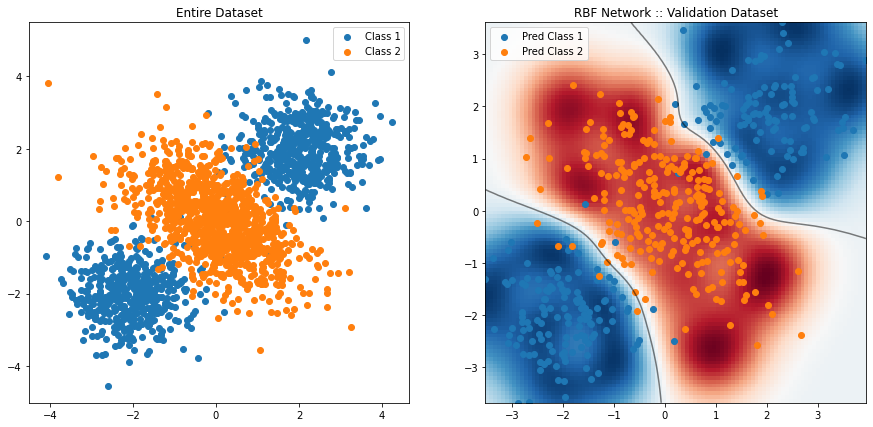

In [14]:
plot(clf_result_dict=clf_result_dict, entire_dataset=dataset, val_dataset=val_dataset, is_saved=True)